In [132]:
import pandas as pd
import geopandas as gpd

In [133]:
# sample folder geojson path
s_path = r'E:\UPennOneDrive\OneDrive - PennO365\School\UPenn\Spring_2022\CPLN_680\SN3_roads_sample\SpaceNet_Roads_Sample\AOI_4_Shanghai_Roads_Sample\geojson\spacenetroads\spacenetroads_AOI_4_Shanghai_img144.geojson'

In [134]:
# import sample folder data
s_df = gpd.read_file(s_path)

In [135]:
s_df = s_df.to_crs('EPSG:32651')

C:\Users\nj_ta\miniconda3\envs\cpln-680\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

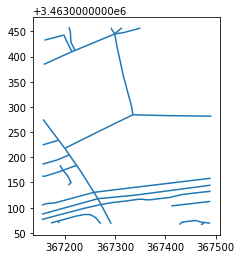

In [136]:
s_df.plot()

In [137]:
pd.to_numeric(s_df['lane_number'])*3.5

0     14.0
1      3.5
2     14.0
3     14.0
4      3.5
5      3.5
6     14.0
7      3.5
8      3.5
9      3.5
10     3.5
11     3.5
12    14.0
13     3.5
14     7.0
15    14.0
16     3.5
17    14.0
18     3.5
19     3.5
20     3.5
21     7.0
22     7.0
23    14.0
24    14.0
Name: lane_number, dtype: float64

In [138]:
s_df['buff_dist'] = pd.to_numeric(s_df['lane_number'])*3

In [139]:
s_df['geometry'] = s_df.buffer(distance = s_df['buff_dist'], cap_style = 2)

In [140]:
s_df['dissolve_field'] = 1

In [141]:
s_df = s_df.dissolve(by = 'dissolve_field')

In [142]:
s_df.to_file("new.geojson", driver='GeoJSON')